<a href="https://colab.research.google.com/github/Manasatchi/DATA_SCIENCE/blob/EDA/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Loading the Data:

In [ ]:
data = pd.read_csv("used_cars_data.csv")

#Analyzing the Data

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage km/l       7251 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 680.1+ KB


#Check for Duplication

In [ ]:
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


# Data Cleaning:

#Missing Values Calculation

In [ ]:
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage km/l,2
Seats,53


In [ ]:
(data.isnull().sum()/(len(data)))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage km/l,0.027575
Seats,0.730732


# Data Reduction

In [ ]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage km/l       7251 non-null   float64
 8   Seats              7200 non-null   float64
 9   New_Price          1006 non-null   object 
 10  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 623.4+ KB


#Feature Engineering

In [ ]:
# prompt: Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

# Example: Creating a new feature 'car_age' from 'year'
current_year = 2024  # Replace with the current year
data['Car_age'] = current_year - data['Year']

# Example: Binning the 'mileage' feature
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['Price_category'] = pd.cut(data['Price'], bins=bins, labels=labels)




#Creating Features

In [ ]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Car_Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,11


In [ ]:
data['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [ ]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


#Data Cleaning/Wrangling

In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Car_Age,Brand,Model
13,13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,10,Land,RoverRange
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,12,Land,RoverFreelander
176,176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,7,Mini,CountrymanCooper
191,191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,6,Land,RoverRange
228,228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,7,Mini,CooperConvertible


In [ ]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

# EDA Exploratory Data Analysis

             S.No.         Year  Kilometers_Driven        Seats        Price  \
count  7253.000000  7253.000000       7.253000e+03  7200.000000  6019.000000   
mean   3626.000000  2013.365366       5.869906e+04     5.279722     9.479468   
std    2093.905084     3.254421       8.442772e+04     0.811660    11.187917   
min       0.000000  1996.000000       1.710000e+02     0.000000     0.440000   
25%    1813.000000  2011.000000       3.400000e+04     5.000000     3.500000   
50%    3626.000000  2014.000000       5.341600e+04     5.000000     5.640000   
75%    5439.000000  2016.000000       7.300000e+04     5.000000     9.950000   
max    7252.000000  2019.000000       6.500000e+06    10.000000   160.000000   

           Car_age      Car_Age  
count  7253.000000  7253.000000  
mean     10.634634    10.634634  
std       3.254421     3.254421  
min       5.000000     5.000000  
25%       8.000000     8.000000  
50%      10.000000    10.000000  
75%      13.000000    13.000000  
max    

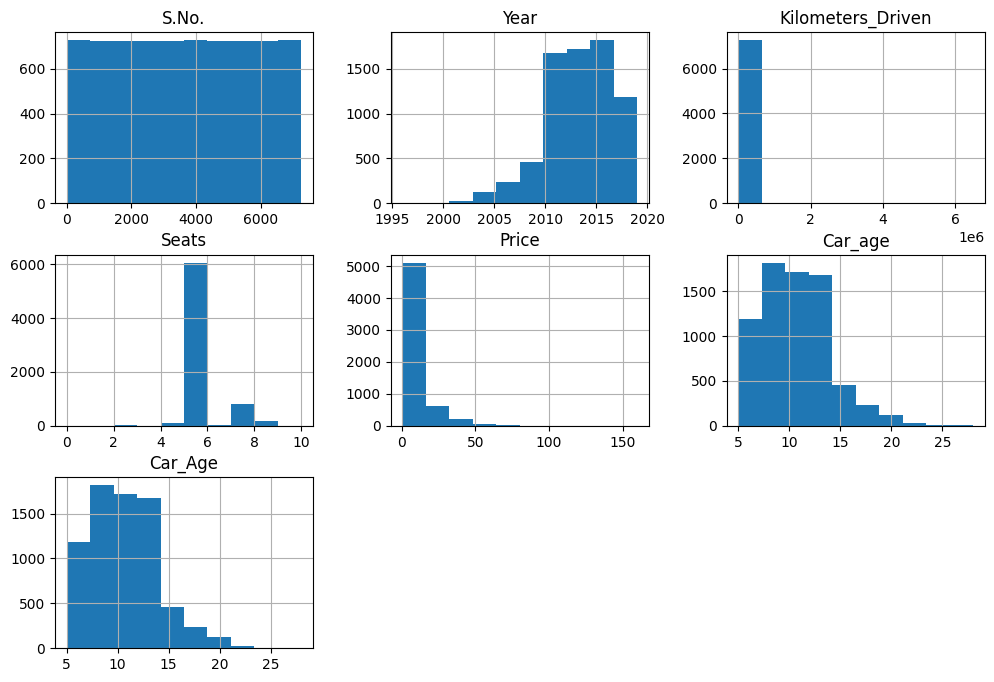

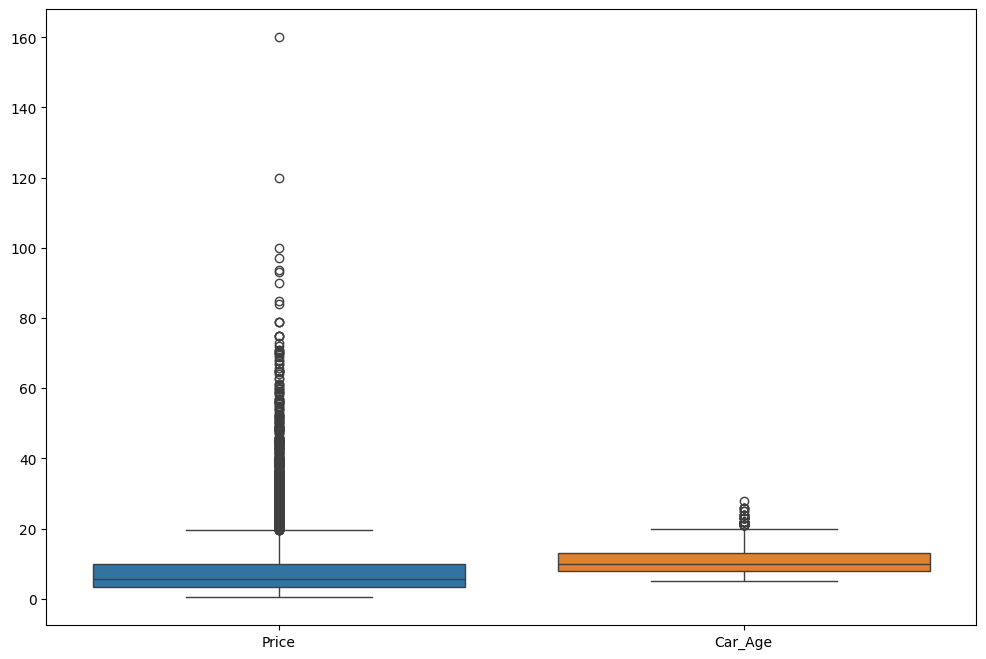

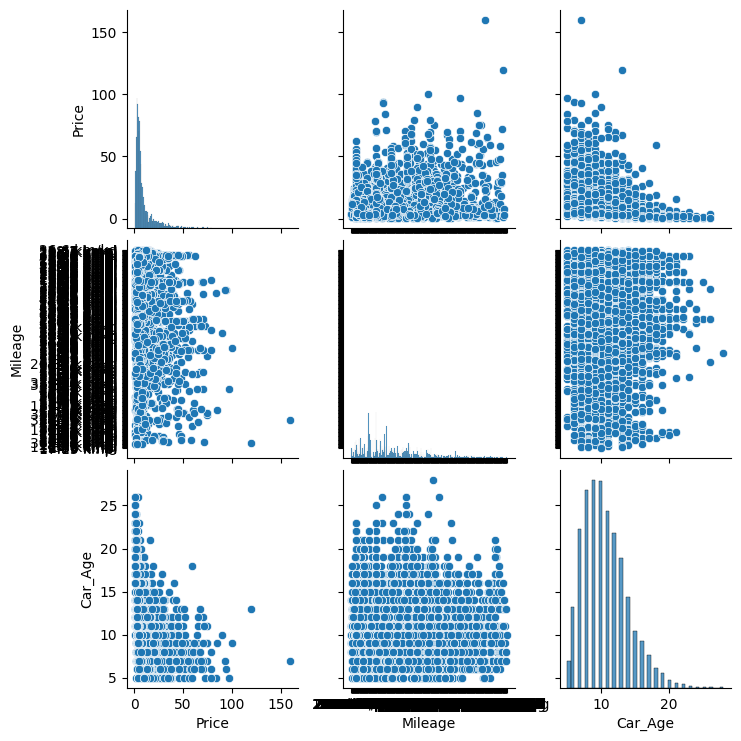

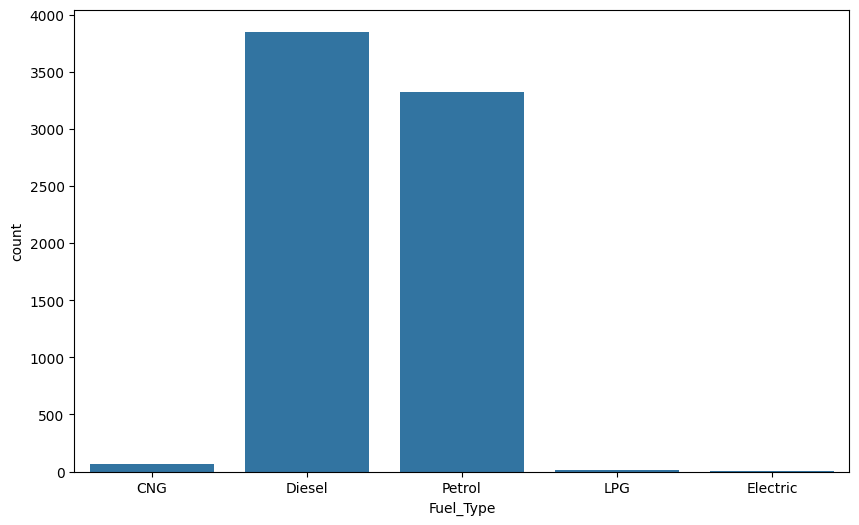

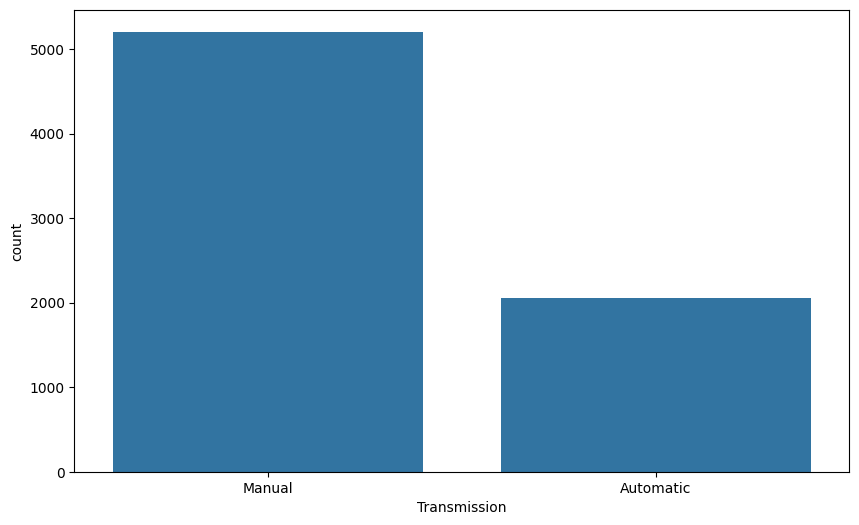

<Figure size 1000x800 with 0 Axes>

In [ ]:
# prompt: xploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.
# EDA can be leveraged to check for outliers, patterns, and trends in the given data.
# EDA helps to find meaningful patterns in data.
# EDA provides in-depth insights into the data sets to solve

import matplotlib.pyplot as plt
# Summary statistics
print(data.describe())

# Histograms for numerical features
data.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Price', 'Mileage', 'Car_Age']])
plt.show()

# Scatter plots for relationships between numerical features
sns.pairplot(data, vars=['Price', 'Mileage', 'Car_Age'])
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=data)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=data)
plt.show()

# Correlation matrix
#corr_matrix = data.corr() #ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'
plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#Univariate Analysis:

#Statistics Summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#EDA Univariate Analysis

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_age', 'Car_Age']


S.No.
Skew : 0.0


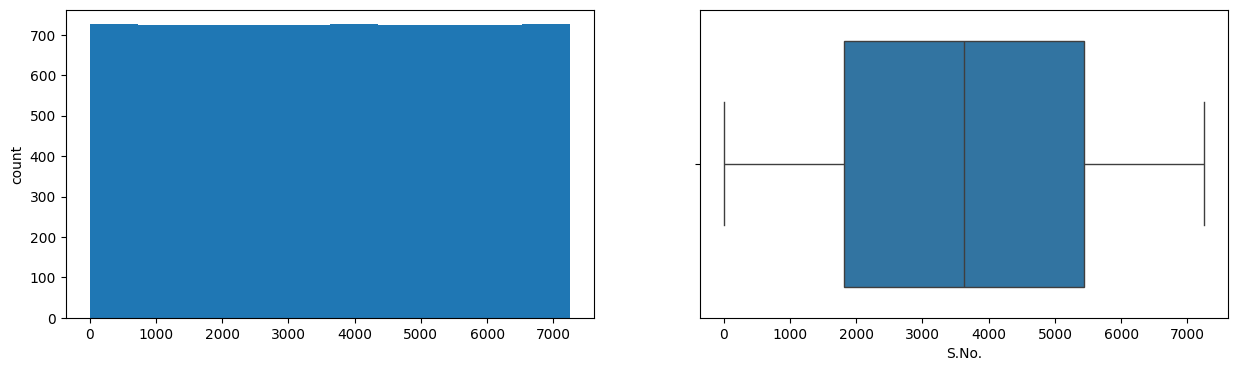

Year
Skew : -0.84


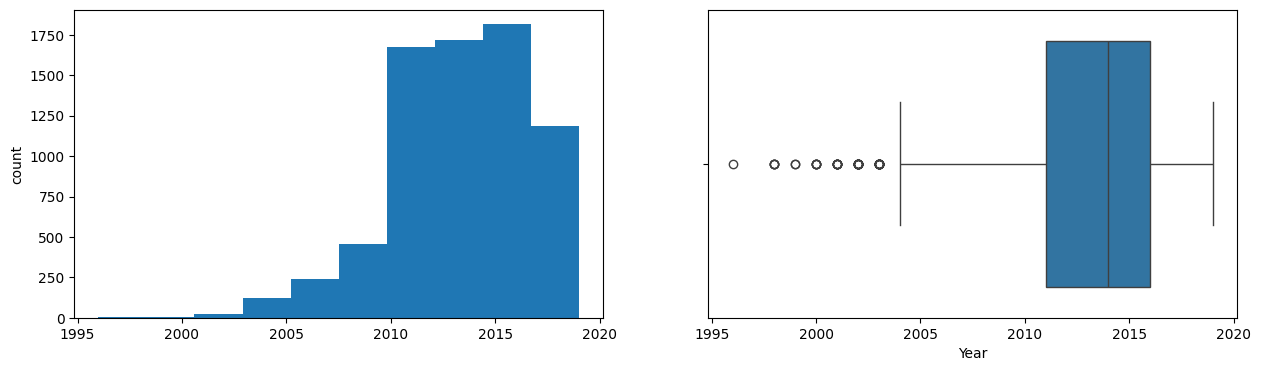

Kilometers_Driven
Skew : 61.58


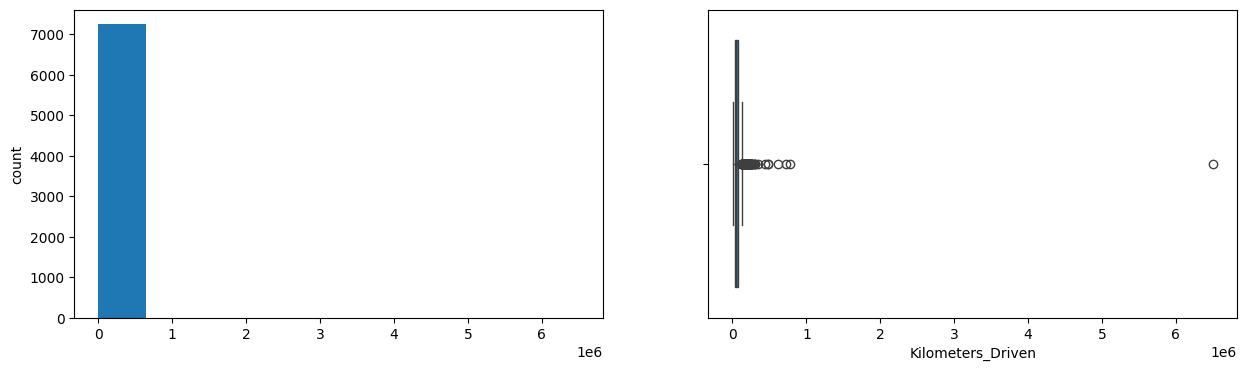

Seats
Skew : 1.9


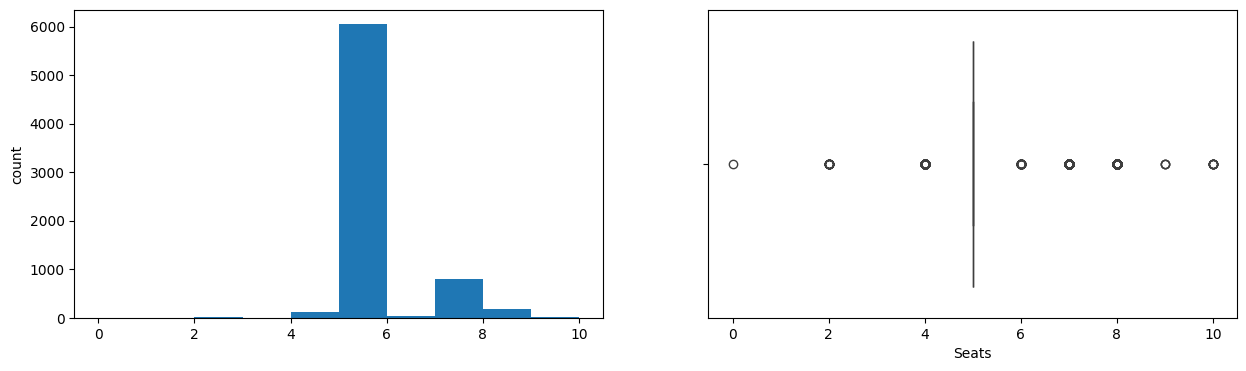

Price
Skew : 3.34


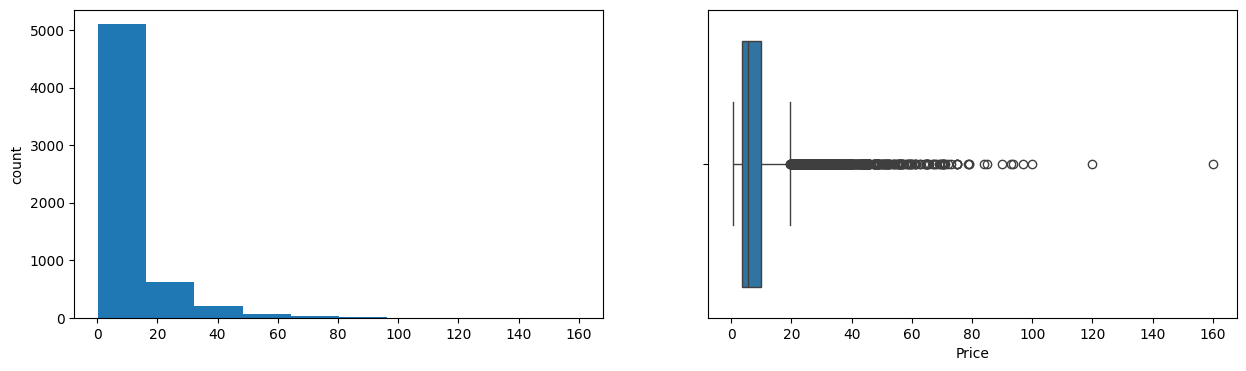

Car_age
Skew : 0.84


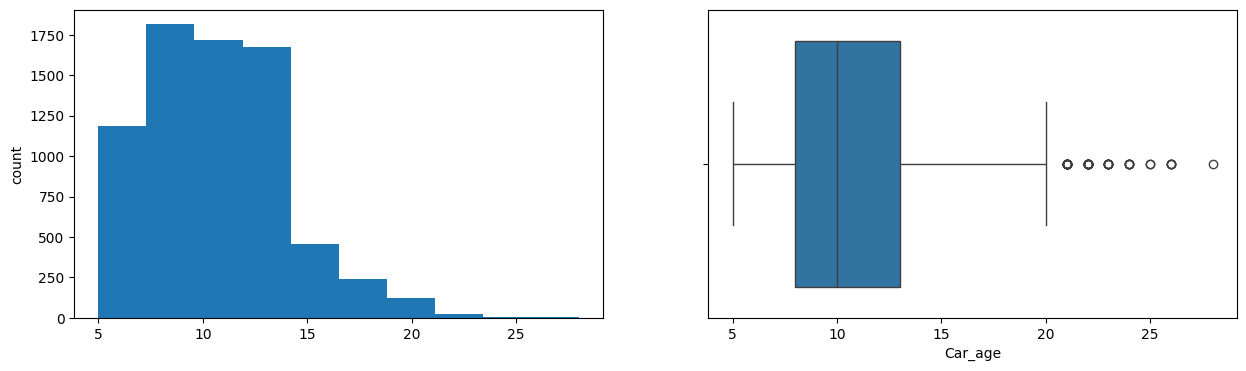

Car_Age
Skew : 0.84


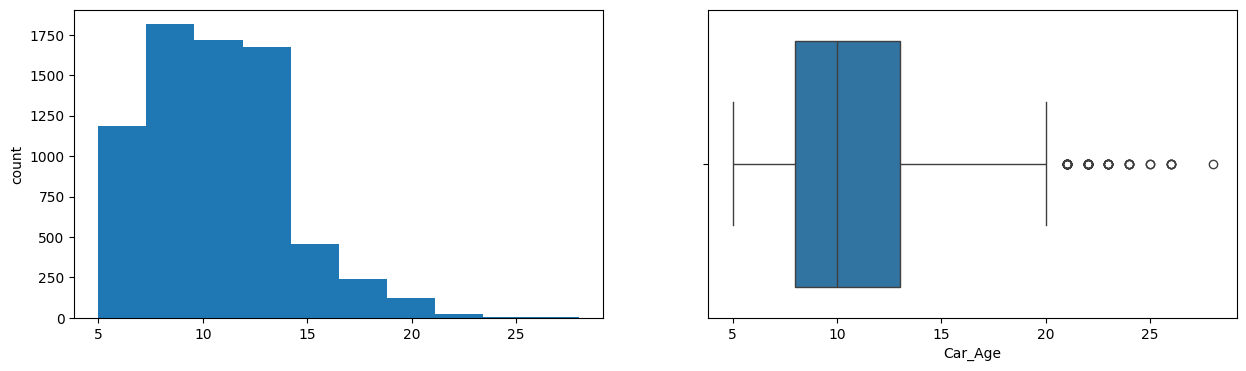

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

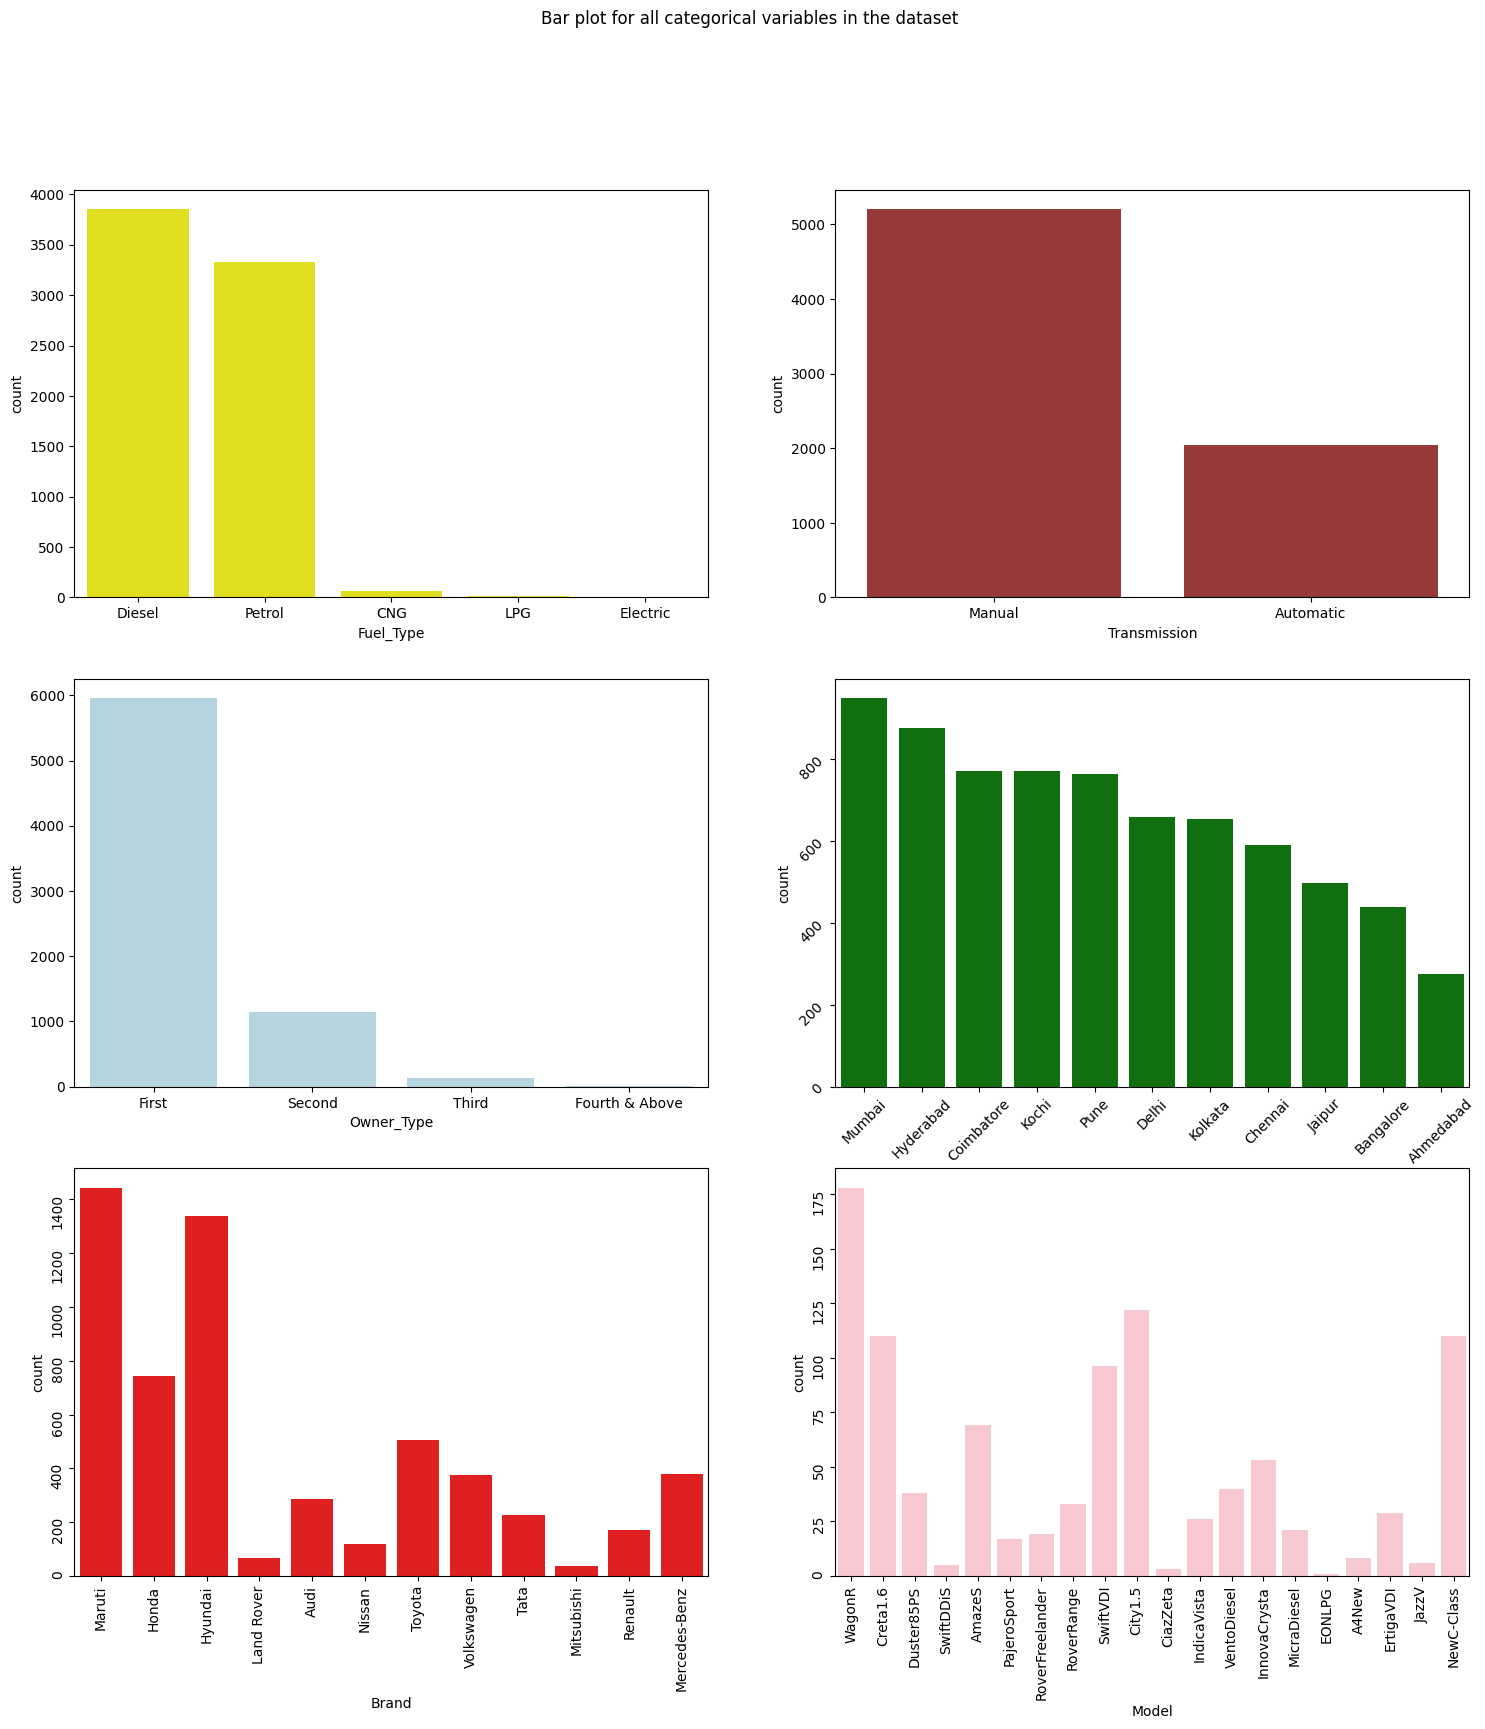

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'yellow',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'brown',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'lightblue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'green',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'red',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'pink',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

#Data Transformation

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [ ]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No.                  7253 non-null   int64  
 1   Name                   7253 non-null   object 
 2   Location               7253 non-null   object 
 3   Year                   7253 non-null   int64  
 4   Kilometers_Driven      7253 non-null   int64  
 5   Fuel_Type              7253 non-null   object 
 6   Transmission           7253 non-null   object 
 7   Owner_Type             7253 non-null   object 
 8   Mileage                7251 non-null   object 
 9   Engine                 7207 non-null   object 
 10  Power                  7207 non-null   object 
 11  Seats                  7200 non-null   float64
 12  New_Price              1006 non-null   object 
 13  Price                  6019 non-null   float64
 14  Car_age                7253 non-null   int64  
 15  Car_

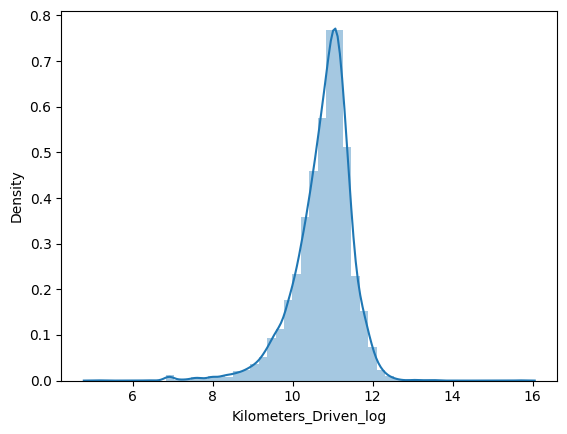

In [ ]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

<Figure size 1300x1700 with 0 Axes>

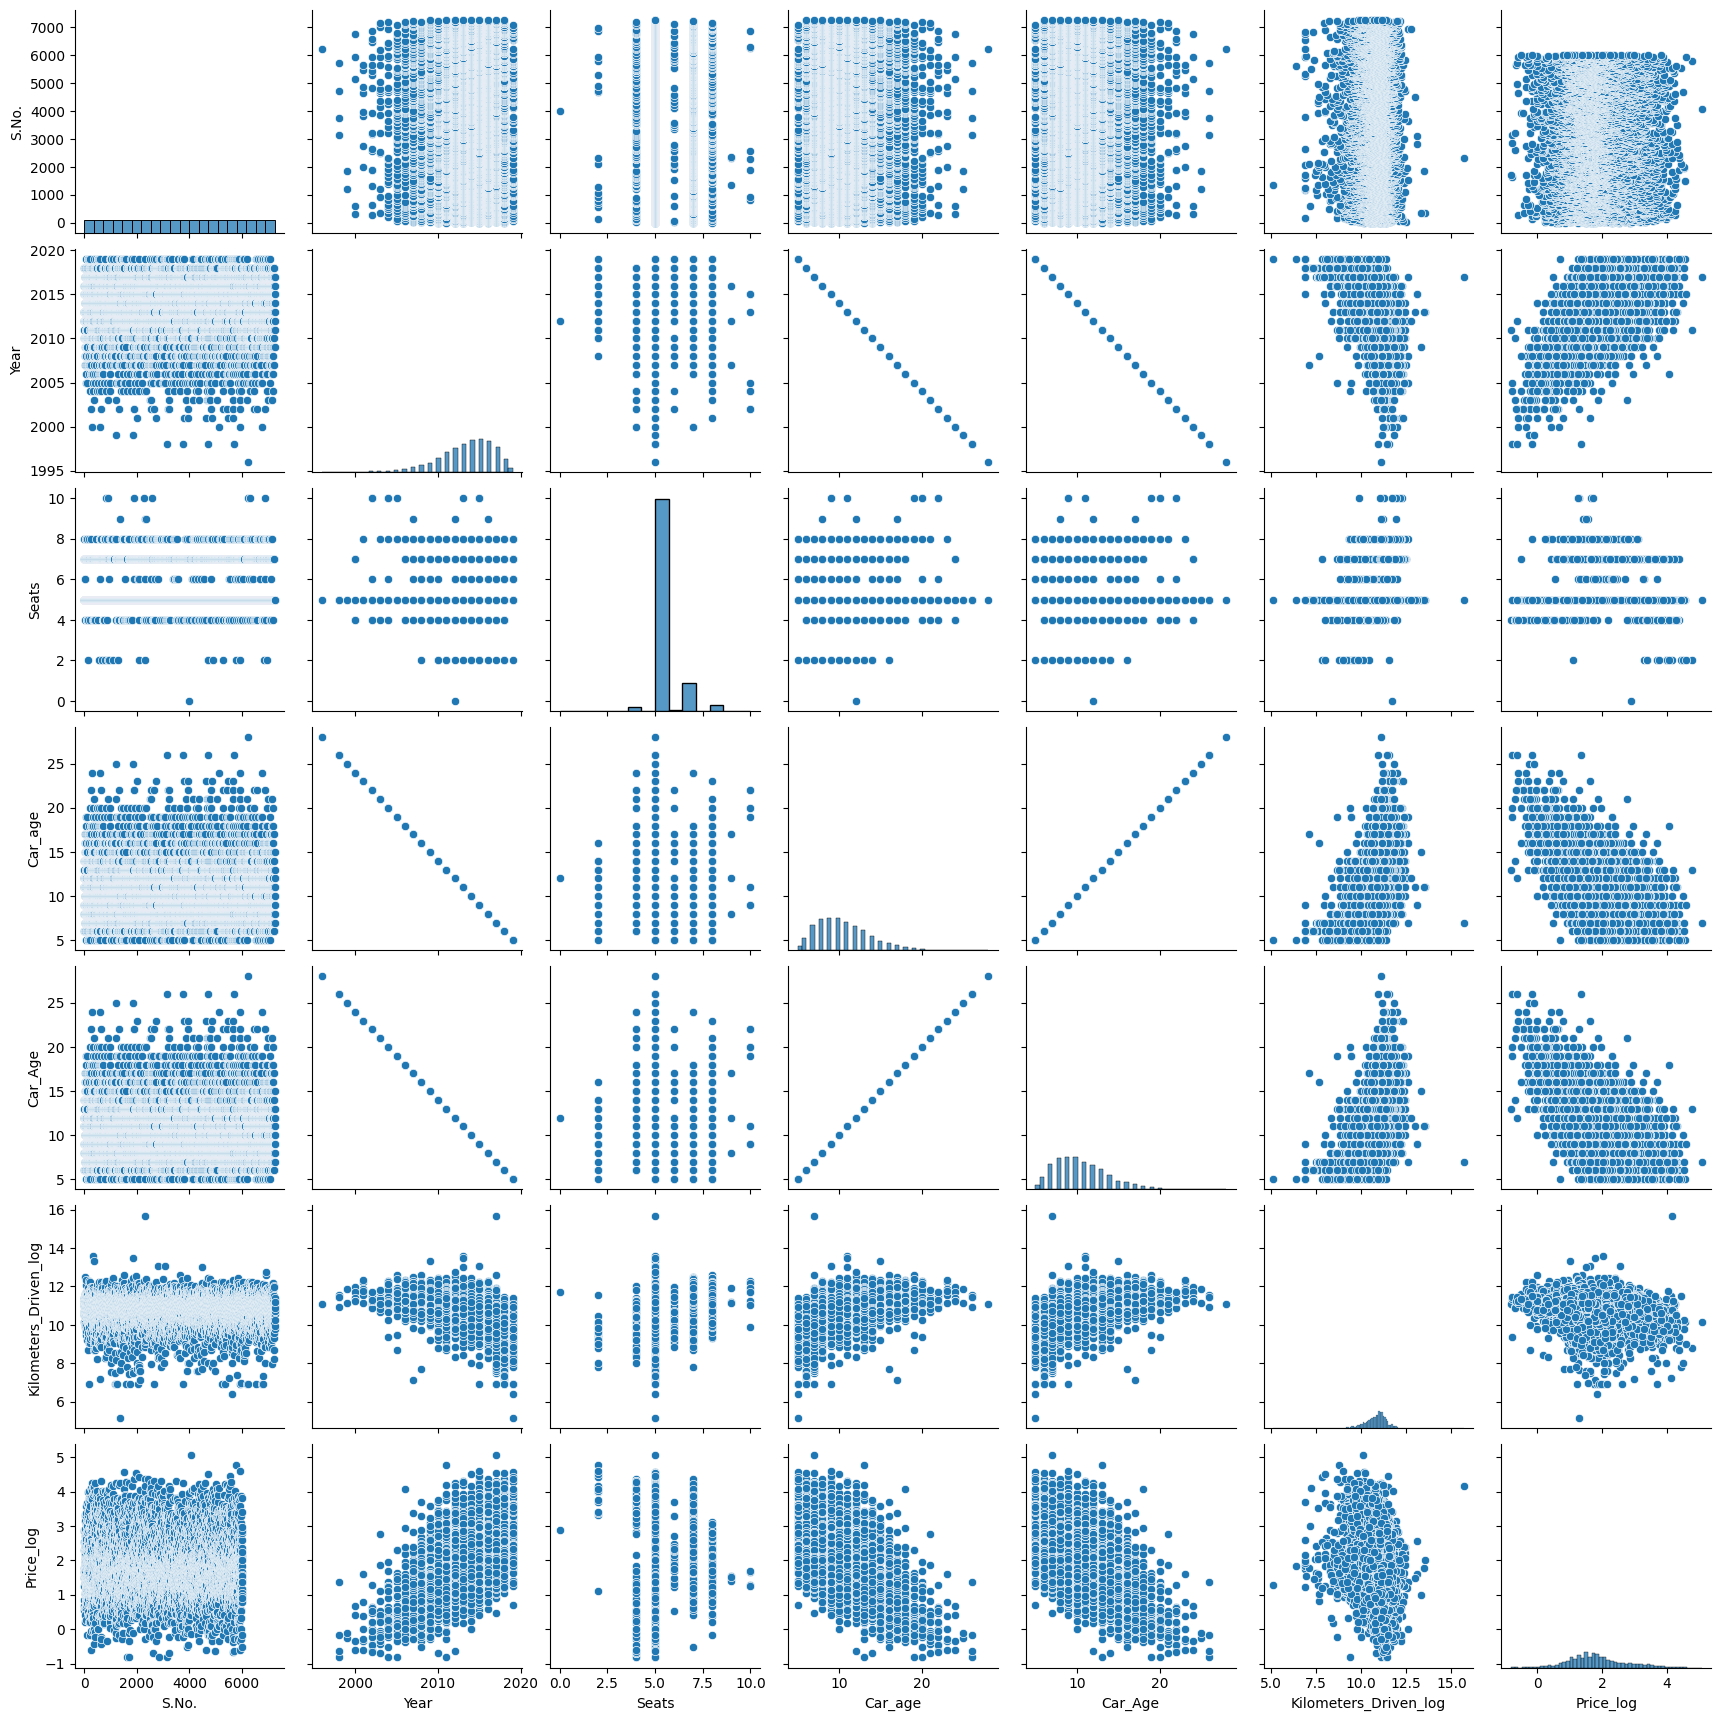

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

#Bivariate Analysis:

#EDA Bivariate Analysis

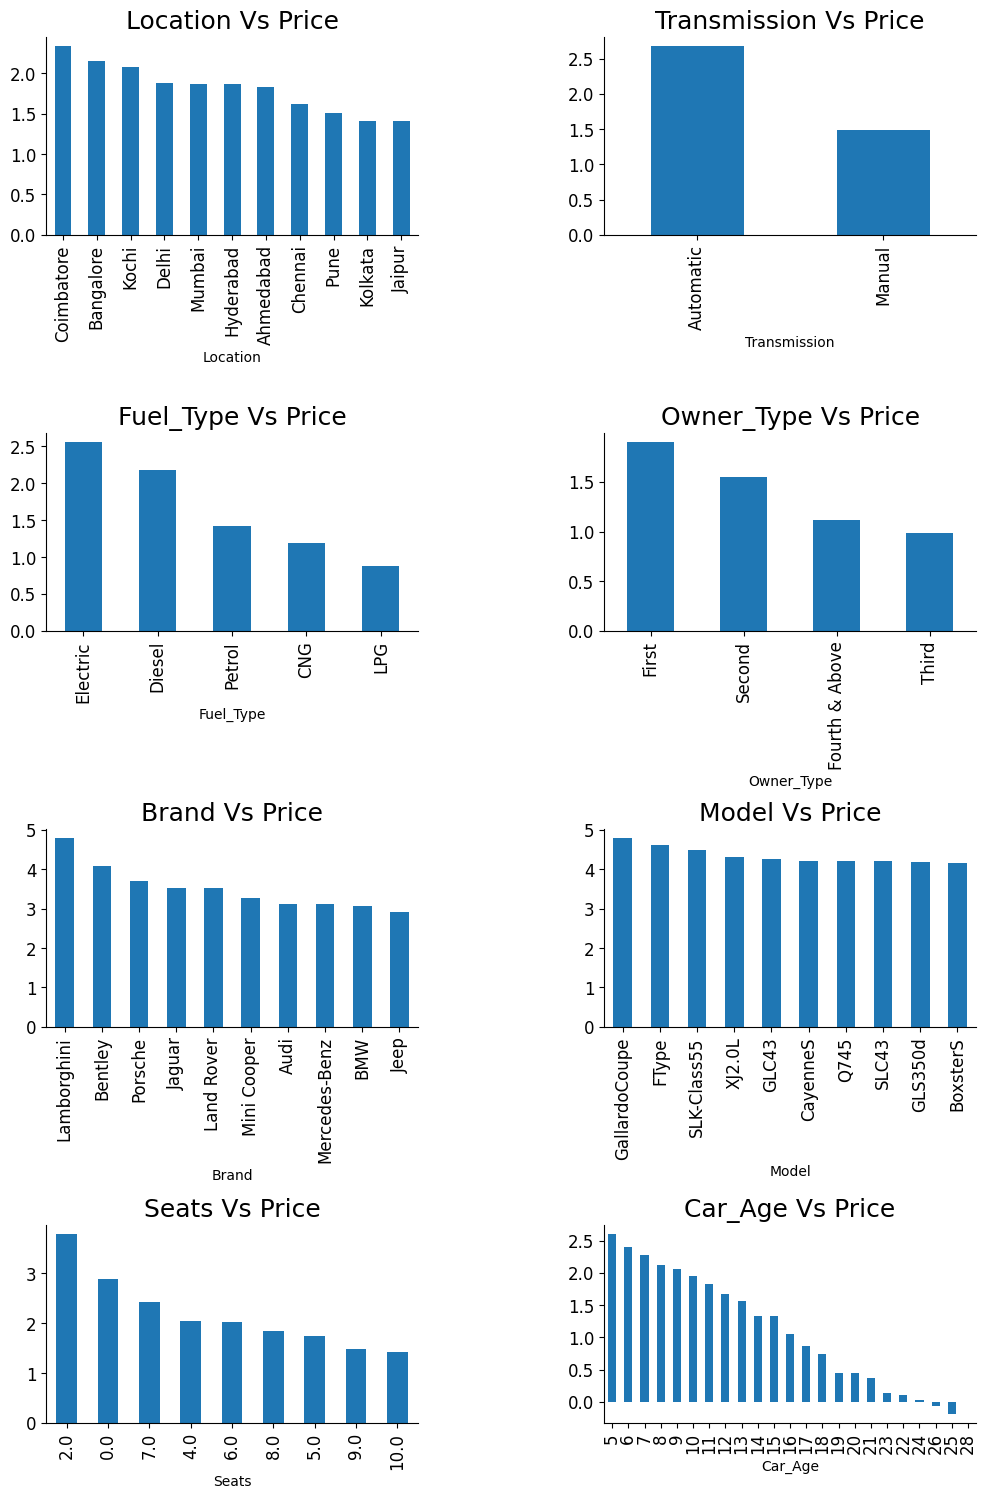

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

#EDA Multivariate Analysis

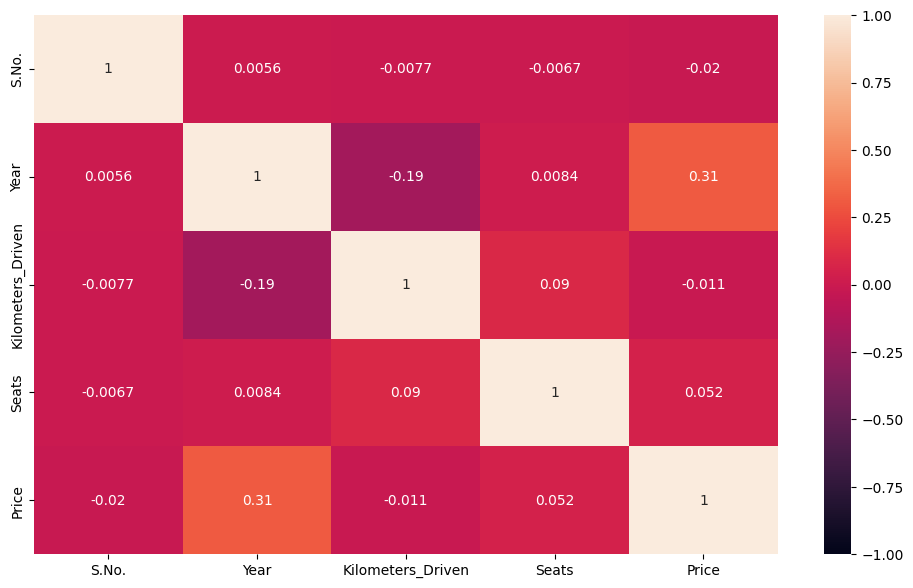

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','New_Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1) # Dropping non-numerical columns
plt.show()

#Impute Missing values

In [ ]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

2

In [ ]:
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
data['Seats'] = data.groupby(['Name','Mileage'])['Seats'].transform(lambda x: x.fillna(x.median()))
data['Year'] = data.groupby(['Name','Mileage'])['Year'].transform(lambda x: x.fillna(x.median()))
data['Kilometers_Driven'] = data.groupby(['Name','Mileage'])['Kilometers_Driven'].transform(lambda x: x.fillna(x.median()))